In [189]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

from utils import *
from models import *

%load_ext autoreload
%autoreload utils models

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

def regression_fn(x, w1, w2):
    actual = (
        w1 * torch.tanh(w2 * x)
    )
    return actual




Using cpu device


In [185]:
w_true = (0.3, 0.3)
model_true = Model(*w_true, regression_fn=regression_fn).to(device)

n = 100
r = 9
sigma = 0.1

X_train =  (torch.rand((r, n)) - 1/2) * 2 # Uniform(-1, 1)
noise = torch.randn((r, n)) * sigma
y_train = model_true(X_train) + noise

training_data = MyDataset(X_train.detach().numpy(), y_train.detach().numpy())



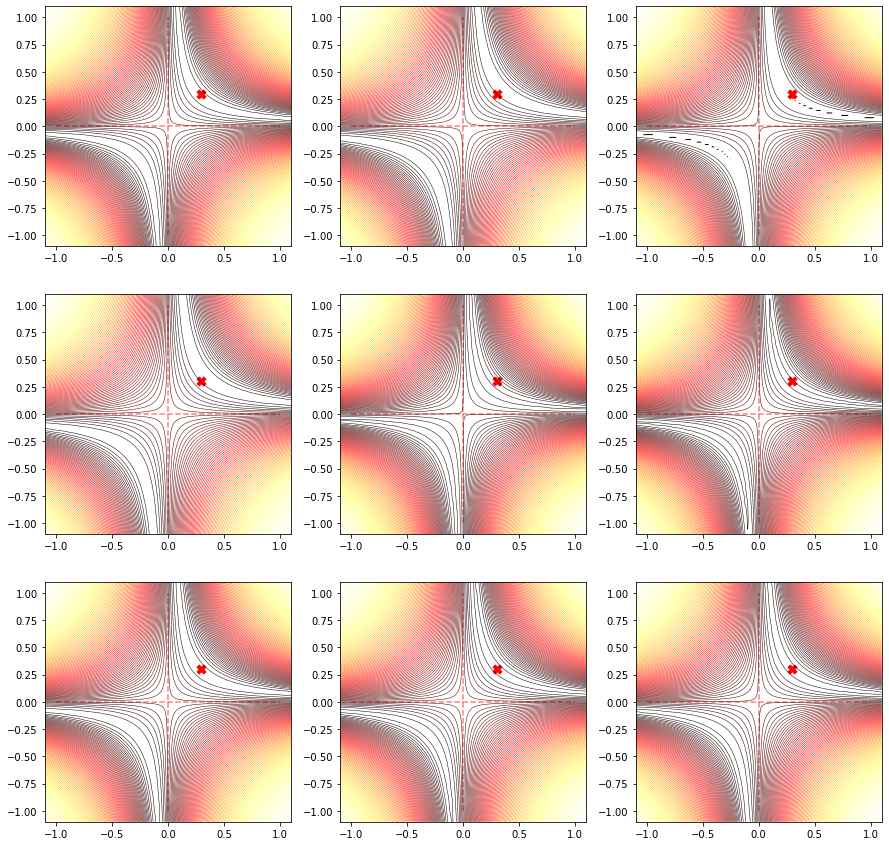

In [186]:
nrows = r // 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, nrows * 5))
axes = np.ravel(axes)
for i in range(r):
    ax = axes[i]
    ax.scatter([w_true[0]], [w_true[1]], s=80, color="red", marker="X")

    ax.vlines([0], ymin=-1, ymax=1, linestyles="dashed", color="red", alpha=0.5)
    ax.hlines([0], xmin=-1, xmax=1, linestyles="dashed", color="red", alpha=0.5)

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    w1_axis = np.linspace(xmin, xmax, num=100)
    w2_axis = np.linspace(ymin, ymax, num=100)
    W1, W2 = np.meshgrid(w1_axis, w2_axis)
    with torch.no_grad():
        Z = torch.stack(
            [(regression_fn(xval, torch.tensor(W1), torch.tensor(W2)) - yval)**2 
             for xval, yval in zip(X_train[i, :], y_train[i, :])]
        ).mean(axis=0)

    ax.contour(W1, W2, -np.log(Z), levels=100, alpha=1, linewidths=0.5, cmap="hot_r")



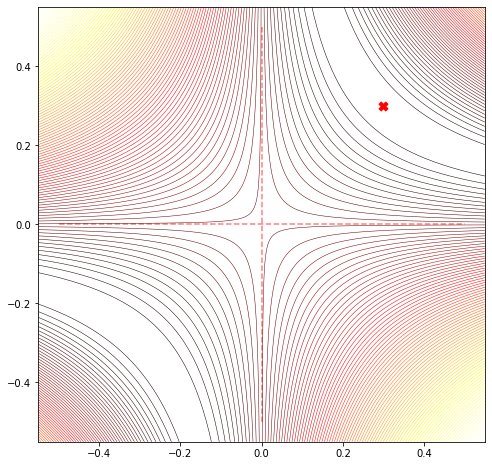

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter([w_true[0]], [w_true[1]], s=80, color="red", marker="X")

ax.vlines([0], ymin=-.5, ymax=.5, linestyles="dashed", color="red", alpha=0.5)
ax.hlines([0], xmin=-.5, xmax=.5, linestyles="dashed", color="red", alpha=0.5)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
w1_axis = np.linspace(xmin, xmax, num=150)
w2_axis = np.linspace(ymin, ymax, num=150)
W1, W2 = np.meshgrid(w1_axis, w2_axis)
with torch.no_grad():
    Z = torch.stack(
        [(regression_fn(xval, torch.tensor(W1), torch.tensor(W2)) - yval)**2 
         for xval, yval in zip(X_train.mean(axis=0), y_train.mean(axis=0))]
    ).mean(axis=0)

ax.contour(W1, W2, -np.log(Z), levels=100, alpha=1, linewidths=0.5, cmap="hot_r")
